<a href="https://colab.research.google.com/github/eraldoitalo/Sinopse-de-CASE-Matem-tica-para-Neg-cios/blob/main/CalculadoraCDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Dados da simulacao
aporte_mensal = 700 #reais
periodos = [5, 10, 15] #anos
meses = [p * 12 for p in periodos]

In [3]:
#taxa anuais brutas
taxa_anuais = {
    "CDB Prefixado Santander": 0.1572,
    "CDB IPCA+ Haitong Brasil": 0.1343,
    "CDB Prefixado Daycoval": 0.145,
}

In [4]:
# Função para calcular o mentante acumulado com os aportes mensais
def calcular_montante(aporte, taxa_anual, meses):
  taxa_mensal = (1 + taxa_anual) ** (1/12) - 1
  montante = aporte * (((1 + taxa_mensal) ** meses - 1) / taxa_mensal)
  return montante

In [5]:
# Função para calcular o IR conforme a tabela regressiva
def calcular_ir(montante_bruto, total_investido, anos):
  lucro = montante_bruto - total_investido
  if anos <= 2:
    aliquota = 0.175
  elif anos <= 5:
    aliquota = 0.15
  elif anos <= 10:
    aliquota = 0.10
  else:
    aliquota = 0.075
  imposto = lucro * aliquota
  valor_liquido = montante_bruto - imposto
  return imposto, valor_liquido

In [11]:
# Recalcular os montantes e IR com o novo aporte
resultados = []
for nome, taxa in taxa_anuais.items():
  for anos, total_meses in zip(periodos, meses):
    montante_bruto = calcular_montante(aporte_mensal, taxa, total_meses)
    total_investido = aporte_mensal * total_meses
    imposto, valor_liquido = calcular_ir(montante_bruto, total_investido, anos)
    resultados.append({
        "Investimento": nome,
        "Período (anos)": anos,
        "Valor Total Investido R$": round(total_investido, 2),
        "Valor Bruto R$": round(montante_bruto, 2),
        "Imposto de Renda R$": round(imposto, 2),
        "Valor Lìquido R$": round(valor_liquido, 2)
    })

df_resultados = pd.DataFrame(resultados)
df_resultados

,Investimento,Período (anos),Valor Total Investido R$,Valor Bruto R$,Imposto de Renda R$,Valor Lìquido R$
0,CDB Prefixado Santander,5,42000,61479.00,2921.85,58557.15
1,CDB Prefixado Santander,10,84000,189054.97,10505.50,178549.47
2,CDB Prefixado Santander,15,126000,453789.76,24584.23,429205.53
3,CDB IPCA+ Haitong Brasil,5,42000,58203.23,2430.49,55772.75
4,CDB IPCA+ Haitong Brasil,10,84000,167494.83,8349.48,159145.35
5,CDB IPCA+ Haitong Brasil,15,126000,372718.02,18503.85,354214.17
6,CDB Prefixado Daycoval,5,42000,59713.61,2657.04,57056.57
7,CDB Prefixado Daycoval,10,84000,177230.63,9323.06,167907.57
8,CDB Prefixado Daycoval,15,126000,408505.37,21187.90,387317.46


In [12]:
# Adicionando uma nova coluna
df_resultados["Juros Gerados R$"] = df_resultados["Valor Bruto R$"] - df_resultados["Valor Total Investido R$"]
df_resultados[["Investimento", "Período (anos)", "Juros Gerados R$"]]

,Investimento,Período (anos),Juros Gerados R$
0,CDB Prefixado Santander,5,19479.00
1,CDB Prefixado Santander,10,105054.97
2,CDB Prefixado Santander,15,327789.76
3,CDB IPCA+ Haitong Brasil,5,16203.23
4,CDB IPCA+ Haitong Brasil,10,83494.83
5,CDB IPCA+ Haitong Brasil,15,246718.02
6,CDB Prefixado Daycoval,5,17713.61
7,CDB Prefixado Daycoval,10,93230.63
8,CDB Prefixado Daycoval,15,282505.37


In [20]:
# Gerar um gráfico
import matplotlib.pyplot as plt


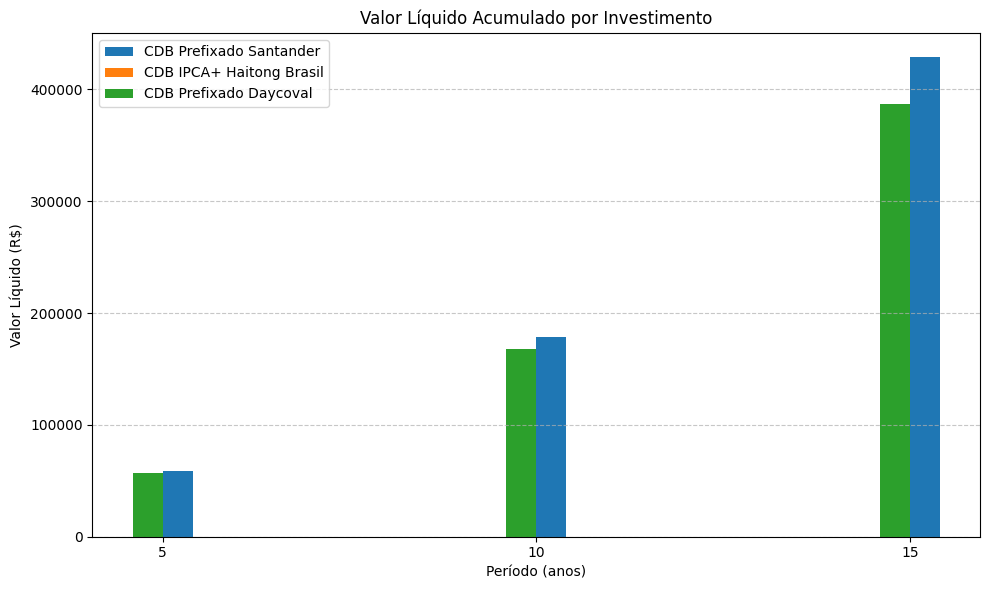

In [24]:
# Criar gráfico de barras para Valor Líquido por Investimento e Período
plt.figure(figsize=(10, 6))
for investimento in df_resultados["Investimento"].unique():
    dados = df_resultados[df_resultados["Investimento"] == investimento]
    plt.bar(
        dados["Período (anos)"] + (0.2 if "Santander" in investimento else -0.2),
        dados["Valor Lìquido R$"],
        width=0.4,
        label=investimento
    )

plt.title("Valor Líquido Acumulado por Investimento")
plt.xlabel("Período (anos)")
plt.ylabel("Valor Líquido (R$)")
plt.xticks(periodos)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()